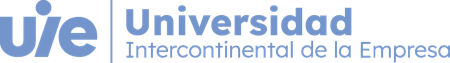

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

# PLD4. Regresión Logística _Scratch_ (con Gradiente Descendente)

En este *notebook* se procede a implementar un modelo de regresión logística desde cero (_scratch_), es decir, sin utilizar librerías Scikit-Learn. Se implementará el algoritmo de gradiente descendente para minimizar la función de coste.


In [63]:
import numpy as np
from sklearn.datasets import (  # Interesante para generar datos de prueba
    make_classification,
)

## Creación de datos _dummy_

In [64]:
# Creamos un conjunto de datos de clasificación sintético
data = make_classification(
    n_samples=100,    # Número de muestras
    n_features=5,    # Número total de características     
)
X = data[0]  
Y = data[1]  
display(X) 
display(Y) 

array([[-1.90415249,  0.85127746, -0.08955516,  0.86863134, -0.4699998 ],
       [ 1.56586389,  0.22541245, -0.19469122, -1.11948242, -0.85319442],
       [ 1.77572237, -0.94971736, -1.10767447, -0.7418093 ,  0.64707753],
       [ 0.8201975 ,  0.85006081,  0.72341421, -0.90685441, -1.42744242],
       [ 1.53071095,  0.04388122, -0.45866   , -1.01709024, -0.59764837],
       [ 1.21118649, -1.02022239, -0.175982  , -0.34291767,  0.94026044],
       [-1.07053662,  1.02684055, -0.51613617,  0.24832978, -0.9986398 ],
       [ 1.18774062, -1.2451357 ,  0.50873816, -0.22916438,  1.2497978 ],
       [ 0.64176449, -1.17766677,  0.11627622,  0.09722197,  1.3516234 ],
       [-0.39144628, -0.63638821,  1.22025008,  0.53380165,  0.99028005],
       [-0.74798873, -0.67977874,  0.49828614,  0.78523031,  1.1739202 ],
       [-2.48746129,  0.6921683 ,  0.99943928,  1.31855272, -0.05151811],
       [ 0.91708016, -0.42897802,  0.12948865, -0.41003957,  0.25179298],
       [ 0.61423478, -1.29960818,  1.0

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

## Implementación del modelo por partes

Primero se procede a implementar las funciones necesarias para el modelo de regresión logística. Se implementarán las siguientes funciones:

1. `predict`: $W^TX + b$, donde $W$ es el vector de pesos y $b$ es el sesgo o _bias_.
2. `sigmoid`: $\frac{1}{1 + e^{-\text{predict}(X)}}$.
3. `loss`: $-\frac{1}{m} \sum_{i=1}^{m} y_i \log(\text{sigmoid}(X_i)) + (1 - y_i) \log(1 - \text{sigmoid}(X_i))$.
4. `dl_dw`, derivada de la función de coste respecto a los pesos: $\frac{1}{m} \sum_{i=1}^{m} (\text{sigmoid}(X_i) - y_i)X_i$.
5. `dl_db`, derivada de la función de coste respecto al sesgo: $\frac{1}{m} \sum_{i=1}^{m} (\text{sigmoid}(X_i) - y_i)$.
6. `update`, actualización de los pesos y el sesgo: $W = W - \alpha \text{dl\_dw}$ y $b = b - \alpha \text{dl\_db}$, siendo $\alpha$ la tasa de aprendizaje.
7. `fit`, función que, a partir de las piezas anteriores, entrena el modelo en un número de iteraciones dado.



In [65]:
predict = lambda x, w, b:np.dot(x, w) + b

sigmoid = lambda z: 1 / (1 + np.exp(-z))

loss = lambda y, sigmoid: -(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid)).mean()

dldw = lambda x, y, sigmoid: (np.reshape(sigmoid -y , (x.shape[0], 1)) * x).mean(axis=0)

dlb = lambda y, sigmoid: (sigmoid - y).mean(axis=0)

update = lambda a, g, lr: a - (lr * g)


In [66]:
# Funciones normales

def __predict(x, w, b):
    return np.dot(x, w) + b

def __sigmoid(yhat):
    return 1 / (1 + np.exp(-yhat))

def __loss(y, sigmoid):
    return -(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid)).mean()

def __dldw(x, y, sigmoid):
    return np.reshape(sigmoid -y , (x.shape[0], 1)) * x.mean(axis=0)

def __dlb(y, sigmoid):
    return (sigmoid - y).mean(axis=0)

def __update(a, g, lr):
    return a - (lr * g)

In [67]:
# Init
learning_rate = 0.1
n_iter= 600
b=0
w=np.zeros(X.shape[1])
print(w.shape)

(5,)


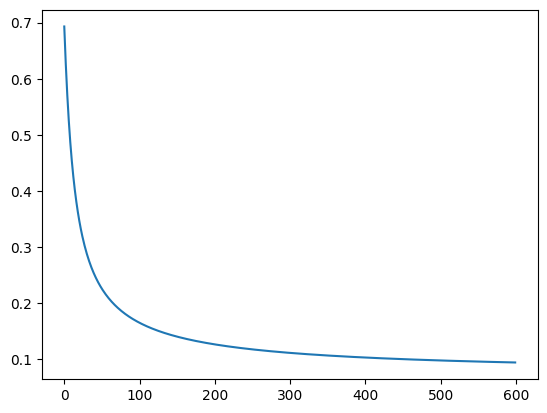

In [68]:
import matplotlib.pyplot as plt

losses = []
# Fit
for i in range(n_iter):
    yhat = predict(X, w, b)
    sig = sigmoid(yhat)

    logloss = loss(Y, sig)
    losses.append(logloss)

    grad_w = dldw(X, Y, sig)
    grad_b = dlb(Y, sig)

    w = update(w, grad_w, learning_rate)
    b = update(b, grad_b, learning_rate)

plt.plot(losses)

In [69]:
from sklearn.metrics import classification_report

yhat = predict(X, w, b)
sigy = sigmoid(yhat)

ypred = sigy >= 0.5

print(classification_report(Y, ypred))          

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.96      1.00      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



## Arquetipado del modelo completo

Una vez implementadas las funciones anteriores y realizadas algunas pruebas sencillas de corte numérico, se procederá a implementar el modelo completo de regresión logística en forma de clase, con los métodos `fit` y `predict`, siguiendo así el arquetipo habitual que se viene utilizando a lo largo del curso.

In [70]:
# Esqueleto de la clase a implementar


class RegresionLogisticaScratch:
     # Funciones auxiliares 
    predict = lambda x, w, b: np.dot(x, w) + b
    sigmoid = lambda z: 1 / (1 + np.exp(-z))
    loss = lambda y, s: -(y * np.log(s) + (1 - y) * np.log(1 - s)).mean()
    dldw = lambda x, y, s: (np.reshape(s - y, (x.shape[0], 1)) * x).mean(axis=0)
    dlb = lambda y, s: (s - y).mean(axis=0)
    update = lambda a, g, lr: a - (lr * g)
   
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        # Inicialización de parámetros
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for i in range(self.n_iter):
            yhat = predict(X, self.w, self.b)
            sig = sigmoid(yhat)

            logloss = loss(Y, sig)
            self.losses.append(logloss)

            grad_w = dldw(X, Y, sig)
            grad_b = dlb(Y, sig)

            self.w = update(self.w, grad_w, self.lr)
            self.b = update(self.b, grad_b, self.lr)

        # Visualización de la pérdida
        plt.plot(self.losses)

    def predict(self, X, threshold=0.5):
        # Predicción final con sigmoide y umbral
        sigmoid = lambda z: 1 / (1 + np.exp(-z))
        z = np.dot(X, self.w) + self.b
        s = sigmoid(z)
        return (s >= threshold).astype(int)

## Pruebas con datos _dummy_

[0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0
 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1]
Precisión del modelo: 0.9800


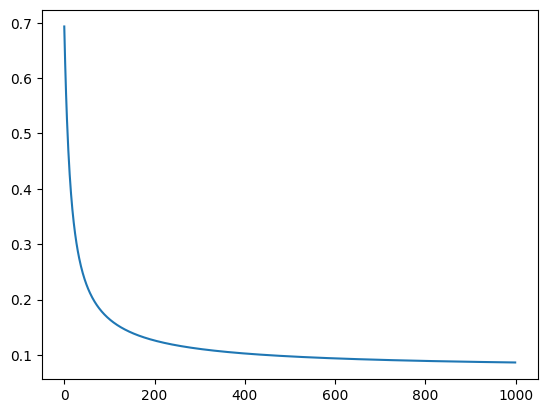

In [71]:
# Entrenamos el modelo con los datos existentes ===
modelo = RegresionLogisticaScratch(lr=0.1, n_iter=1000)
modelo.fit(X, Y)

# Hacemos las predicciones 
y_pred = modelo.predict(X)
print(y_pred)

# Calculamos la precisión ===
accuracy = (y_pred == Y).mean()
print(f"Precisión del modelo: {accuracy:.4f}")

## Pruebas con _dataset_ Titanic

Precisión del modelo (Titanic): 0.8039


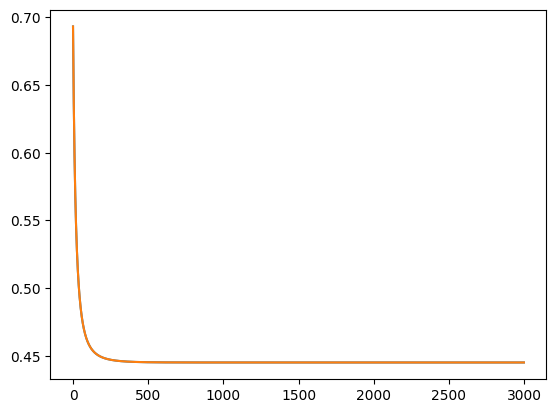

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos el dataset del Titanic
data = pd.read_csv("titanic.csv")

# Seleccionamos las columnas relevantes
cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
data = data[cols]

# Eliminamos filas con valores nulos
data = data.dropna()

# Convertimos 'Sex' a numérico (0 = hombre, 1 = mujer)
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})

# Separamos variables predictoras y objetivo
X = data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].values
Y = data["Survived"].values

# Normalizamos los datos
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Creamos y entrenamos el modelo
modelo_titanic = RegresionLogisticaScratch(lr=0.1, n_iter=3000)
modelo_titanic.fit(X, Y)

# Obtenemos predicciones
y_pred = modelo_titanic.predict(X)

# Calculamos la precisión
accuracy = (y_pred == Y).mean()
print(f"Precisión del modelo (Titanic): {accuracy:.4f}")

# Graficamos la evolución de la pérdida
plt.plot(modelo_titanic.losses)


### Comparación con sklearn

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Creamos y entrenamos el modelo de sklearn con los mismos datos
modelo_sklearn = LogisticRegression(max_iter=3000)
modelo_sklearn.fit(X, Y)

# Obtenemos las predicciones
y_pred_sklearn = modelo_sklearn.predict(X)

# Calculamos la precisión
accuracy_sklearn = accuracy_score(Y, y_pred_sklearn)
print(f"Precisión del modelo sklearn (Titanic): {accuracy_sklearn:.4f}")



Precisión del modelo sklearn (Titanic): 0.8053
